<a href="https://colab.research.google.com/github/XiaoTanOvO/Financial-market-overview-and-data-collection-and-preprocessing/blob/main/%E9%87%91%E8%9E%8D%E5%B8%82%E5%A0%B4%E6%A6%82%E8%BF%B0%E8%88%87%E8%B3%87%E6%96%99%E6%94%B6%E9%9B%86%E5%8F%8A%E9%A0%90%E8%99%95%E7%90%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 證交所資訊

In [1]:
# 用於發送HTTP請求來獲取網頁內容。
import requests
# 用於解析HTML文件。
from bs4 import BeautifulSoup
# 用於資料操作，特別是表格資料的處理。
import pandas as pd
# 用於繪製圖表。
import matplotlib.pyplot as plt


# 定義爬取資料的函式

# 定義一個函數它接收兩個參數：股票代碼和查詢日期，用於從台灣證券交易所爬取股價資料。
def get_twse_stock_data(stock_id, date):
  # 生成目標URL，用於請求特定股票在指定日期的日線交易資料。
  url = f"https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=html&date={date}&stockNo={stock_id}"
  # 發送HTTP GET請求，並獲取該URL的回應。
  response = requests.get(url)
  # 解析HTML內容，方便後續提取需要的數據。
  soup = BeautifulSoup(response.text, 'html.parser')

  # 檢查html的格式(tr、td、th等)
  # table = soup.find_all('table')
  # print(table)

  # 解析表格資料

  # 從表格中提取所有的行（tr），這些行包含了每一天的股價資料。
  rows = soup.find_all('tr')
  # 初始化一個空的列表data，用來存儲每一行提取出來的股價資料。
  data = []

  # 遍歷表格中的所有行，跳過前兩行，因為它們是標題或欄位名稱。
  for row in rows[2:]:
    # 從每一行提取所有單元格（td），這些單元格包含了具體的股價數據。
    cols = row.find_all('td')
    # 遍歷提取的單元格，去除每個單元格中的空白字符，提取純文本。
    cols = [col.text.strip() for col in cols]
    # 檢查是否為有效非空的數據行，有數據就將添加到data列表中。
    if len(cols) > 0:
      data.append(cols)

  # 建立 DataFrame

  # 我們選取列表中的第二行（index為1），這是表格的欄位名稱，然後查找所有的欄位名稱單元格（th），結果存儲在列表，這些元素對應於表格的每一列名稱。
  header = rows[1].find_all('th')
  # 遍歷提取的單元格，去除每個單元格中的空白字符，提取純文本。
  columns = [th.text.strip() for th in header]
  # columns = ['日期', '成交股數', '成交金額', '開盤價', '最高價', '最低價', '收盤價', '漲跌價差', '成交筆數']
  # 將列表轉換成pandas DataFrame，並將剛才定義的列名稱分配給DataFrame的列。
  df = pd.DataFrame(data, columns=columns)

  # 轉換數據類型
  df['日期'] = df['日期'].str.replace(',', '')
  df['成交股數'] = df['成交股數'].str.replace(',', '').astype(int)
  df['成交金額'] = df['成交金額'].str.replace(',', '').astype(int)
  df['開盤價'] = df['開盤價'].str.replace(',', '').astype(float)
  df['最高價'] = df['最高價'].str.replace(',', '').astype(float)
  df['最低價'] = df['最低價'].str.replace(',', '').astype(float)
  df['收盤價'] = df['收盤價'].str.replace(',', '').astype(float)
  df['漲跌價差'] = df['漲跌價差'].str.replace(',', '')
  df['成交筆數'] = df['成交筆數'].str.replace(',', '').astype(int)

  return df

stock_id = '2330'  # 台積電
date = '20240901'  # 查詢日期
# 呼叫剛才定義的函數來獲取指定股票在特定日期的交易數據，並將結果存儲。
twse_df = get_twse_stock_data(stock_id, date)
twse_df

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,113/09/02,19272593,18270058260,950.0,955.0,943.0,948.0,+4.00,31642
1,113/09/03,23205623,21908471541,948.0,952.0,939.0,940.0,-8.00,47139
2,113/09/04,93169835,83424133824,894.0,905.0,888.0,889.0,-51.00,393210
3,113/09/05,34147890,30998595394,907.0,915.0,900.0,902.0,+13.00,63902
4,113/09/06,28248063,25786016936,909.0,918.0,903.0,918.0,+16.00,38415
5,113/09/09,38448946,34456838126,892.0,900.0,891.0,899.0,-19.00,102365
6,113/09/10,34312646,31067424234,907.0,911.0,901.0,904.0,+5.00,45141
7,113/09/11,19513256,17621000956,906.0,906.0,900.0,901.0,-3.00,30789
8,113/09/12,43749260,40999951508,936.0,944.0,928.0,940.0,X0.00,80643
9,113/09/13,28307441,26795862243,955.0,955.0,939.0,947.0,+7.00,39071


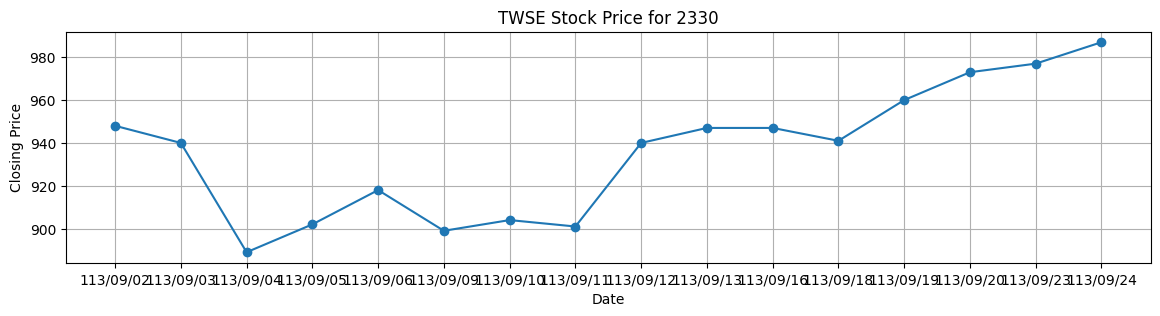

In [2]:
# 可視化
plt.figure(figsize=(14, 3))
plt.plot(twse_df['日期'], twse_df['收盤價'], marker='o', linestyle='-')
plt.title(f'TWSE Stock Price for {stock_id}')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

# 2. Yahoo API股市資訊

In [3]:
# 使用Yahoo Finance API來獲取股票資料。
import yfinance as yf

# 定義一個函數它接收一個參數：股票代號，用於從Yahoo Finance爬取股價資料。
def get_yahoo_stock_data(ticker):
  # 創建了一個股票代號的物件，允許我們訪問該股票的歷史數據、基本面資料等。
  stock = yf.Ticker(ticker)
  # 獲取該股票過去一個月(1mo)的歷史股價數據，並將結果存儲。period參數可以設置不同的時間範圍，如'1d'、'5d'、'1mo'、'1y'等。
  df = stock.history(period="1mo")
  # 重置時間索引並轉換為列。
  df = df.reset_index()
  # 刪除原本的列名稱並設定新的列名稱。
  new_columns = ['日期', '開盤價', '最高價', '最低價', '收盤價', '成交量', '股利', '股票分割']
  df.columns = new_columns  # 設置新的列名稱
  return df

ticker = "2330.TW"  # 台積電在 Yahoo 的代號
# 呼叫剛才定義的函數來獲取指定股票過去一個月的歷史股價數據，並將結果存儲。
yahoo_df = get_yahoo_stock_data(ticker)
yahoo_df

,日期,開盤價,最高價,最低價,收盤價,成交量,股利,股票分割
0,2024-08-26 00:00:00+08:00,952.751394,956.733636,940.804668,945.782471,25057581,0.0,0.0
1,2024-08-27 00:00:00+08:00,940.804613,941.800174,935.826811,937.817932,18693037,0.0,0.0
2,2024-08-28 00:00:00+08:00,940.804627,959.720276,938.813506,959.720276,31059233,0.0,0.0
3,2024-08-29 00:00:00+08:00,937.817977,942.795780,932.840175,938.813538,43530708,0.0,0.0
4,2024-08-30 00:00:00+08:00,939.809082,947.773566,936.822401,939.809082,63834981,0.0,0.0
5,2024-09-02 00:00:00+08:00,945.782442,950.760244,938.813518,943.791321,18646835,0.0,0.0
6,2024-09-03 00:00:00+08:00,943.791327,947.773569,934.831283,935.826843,19547575,0.0,0.0
7,2024-09-04 00:00:00+08:00,890.031086,900.982252,884.057723,885.053284,79709021,0.0,0.0
8,2024-09-05 00:00:00+08:00,902.973347,910.937831,896.004423,897.995544,30512026,0.0,0.0
9,2024-09-06 00:00:00+08:00,904.964455,913.924500,898.991093,913.924500,24458336,0.0,0.0


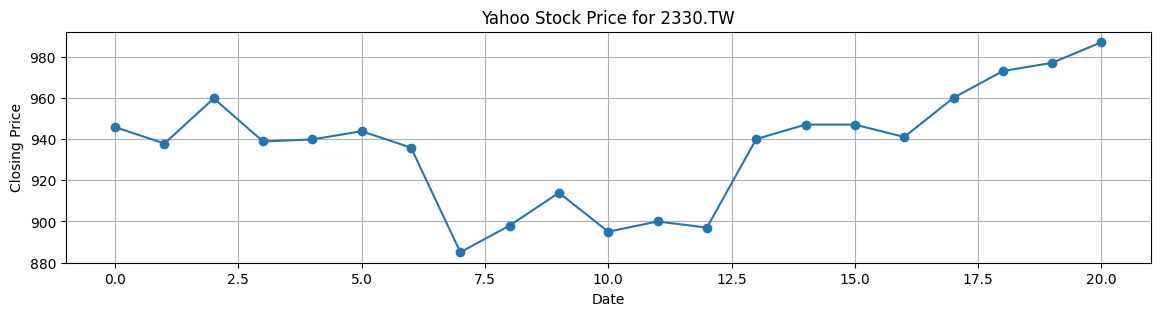

In [4]:
# 可視化
plt.figure(figsize=(14, 3))
plt.plot(yahoo_df.index, yahoo_df['收盤價'], marker='o', linestyle='-')
plt.title(f'Yahoo Stock Price for {ticker}')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

# 3. Yahoo 靜態爬蟲股市資訊

In [5]:
# 用於發送HTTP請求來獲取網頁內容。
import requests
# 用於解析HTML文件。
from bs4 import BeautifulSoup
# 用於資料操作，特別是表格資料的處理。
import pandas as pd

# 定義一個函數，接收一個參數，用來指定要抓取的網頁位址。
def scrape_yahoo_table(url):
  # 傳送HTTP GET請求，取得指定URL的頁面內容，並將其儲存。
  response = requests.get(url)
  # 檢查HTTP回應的狀態碼是否為200，表示請求成功。
  if response.status_code != 200:
    # 如果狀態碼不是200，拋出異常，並顯示錯誤訊息。
    raise Exception(f"Failed to load page:{url}")
  # 將回應內容（HTML文字）解析。使得我們能夠方便地從HTML文件中提取資料。
  soup = BeautifulSoup(response.text, 'html.parser')

  # 尋找HTML文件中符合特定class屬性的table元素，指定了該元素的CSS類別名，這是網頁開發者用來定義樣式的。
  table = soup.find('table', {'class': 'W(100%) Pos(r) Tbl(f) Bdcl(c) BdB Bdc($seperatorColor)'}) # 查找表格

  # 檢查是否成功找到表格元素。
  if not table:
    # 如果沒有找到表格，請拋出異常並給出錯誤提示。
    raise Exception("Table not found in the page")

  # 提取欄位名稱

  # 初始化一個空列表，用於儲存表格的欄位名稱。
  headers = []
  # 找出表格的<thead>部分，通常包含欄位名稱。尋找所有的<th>，這些元素是欄位名稱單元格。
  for th in table.find('thead').find_all('th'):
    # 對每個欄位名稱單元格，提取其文字內容，去除首尾的空白字符，然後將其新增至列表中。
    headers.append(th.text.strip())

  # 提取表格資料

  # 初始化一個空列表，用於儲存表格中的每一行資料。
  rows = []
  # 尋找表格的<tbody>部分，通常包含表格的主體資料。尋找所有的<tr>，這些元素代表表格中的每一行。
  for tr in table.find('tbody').find_all('tr'):
    # 初始化一個空列表，用於儲存目前行中的每一列資料。
    cells = []
    # 在目前行<tr>中尋找所有的<td>，這些元素代表表格中的每一列資料。
    for td in tr.find_all('td'):
      # 對每個單元格，提取其文字內容，去除首尾的空白字符，然後將其添加到列表中。
      cells.append(td.get_text(strip=True))
    # 將每一行清單新增至清單中，清單最終包含了表格的所有資料行。
    rows.append(cells)

  # 將資料轉換為 DataFrame

  # 將提取的資料轉換，並將先前提取的欄位名稱作為列名。
  df = pd.DataFrame(rows, columns=headers)
  # 回傳建置好的DataFrame，方便後續資料分析或展示。
  return df

# 設定要爬取資料的目標URL。
url = 'https://finance.yahoo.com/lookup?s=%7BTICKER%7D'
# 呼叫函數，將傳回從指定URL中提取的表格資料並儲存在df中。
df = scrape_yahoo_table(url)
# 直接列印或查看df，將顯示爬取到的表格資料。
df

,Symbol,Last Price,Change,% Change
0,NVDANVIDIA Corporation,121.29,+5.03,+4.32%
1,BABAAlibaba Group Holding Limited,96.63,+6.54,+7.26%
2,VVisa Inc.,276.19,-12.44,-4.31%
3,"SEELSeelos Therapeutics, Inc.",0.3408,+0.1508,+79.37%
4,PDDPDD Holdings Inc.,112.70,+10.40,+10.17%


# 4. Yahoo 動態爬蟲股市資訊(測試)

In [ ]:
# 用於發送HTTP請求來獲取網頁內容。
import requests
# 用於解析HTML文件。
from bs4 import BeautifulSoup
# 用於資料操作，特別是表格資料的處理。
import pandas as pd
# 用於繪製圖表。
import matplotlib.pyplot as plt

# 爬取Yahoo Finance的股票數據函式

# 定義一個函數它接收一個參數：股票代碼，用於從Yahoo Finance所爬取股價資料。
def scrape_yahoo_stock_data(ticker):
  # 生成Yahoo Finance股票歷史數據頁面URL，將具體股票代碼插入。
  url = f'https://finance.yahoo.com/quote/{ticker}/history?p={ticker}'

  # 發送HTTP GET請求，並獲取該URL的回應。
  response = requests.get(url)
  # 解析HTML內容，方便後續提取需要的數據。
  soup = BeautifulSoup(response.text, 'html.parser')

  # 查找歷史數據表格

  # 查找包含歷史股價資訊的表格，帶有data-test="historical-prices"的屬性。
  table = soup.find('table', {'data-test': 'Historical Data'})
  print(table)

  # 擷取表格的欄位名稱資訊，用於後續設定DataFrame的列名。
  headers = [header.text for header in table.find_all('th')]

  # 提取表格数据

  # 尋找表格中的所有行（tr），跳過欄位名稱行。
  rows = table.find_all('tr')[1:]
  # 初始化一個空的列表data，用來存儲每一行提取出來的股價資料。
  data = []
  # 遍歷表格中的所有行
  for row in rows:
    # 在每一行中查找所有單元格（td），並將這些單元格儲存在列表中。
    cols = row.find_all('td')
    # 过滤掉不包含完整数据的行（比如广告行或空行）。一个有效的股票数据行通常有 7 个 td 元素。
    if len(cols) < 7:
      # 如果某行資料列不足7個，跳過這行資料。
      continue
    # 遍歷提取的單元格，去除每個單元格中的空白字符，提取純文本將添加到data列表中。
    data.append([col.text.strip() for col in cols])

  # 将數據轉化為DataFrame
  df = pd.DataFrame(data, columns=headers)

  # 處理日期、價格和成交量的格式
  df['Date'] = pd.to_datetime(df['Date'])
  df['Open'] = df['Open'].str.replace(',', '').astype(float)
  df['High'] = df['High'].str.replace(',', '').astype(float)
  df['Low'] = df['Low'].str.replace(',', '').astype(float)
  df['Close*'] = df['Close*'].str.replace(',', '').astype(float)
  df['Adj Close**'] = df['Adj Close**'].str.replace(',', '').astype(float)
  df['Volume'] = df['Volume'].str.replace(',', '').astype(float)

  # 重新命名欄位名稱
  df.columns = ['日期', '開盤價', '最高價', '最低價', '收盤價', '調整收盤', '成交量']

  return table

ticker = "TSLA"  # 特斯拉在Yahoo的代碼
yahoo_df = scrape_yahoo_stock_data(ticker)
print(yahoo_df)

In [ ]:
# 可視化
plt.figure(figsize=(14, 3))
plt.plot(yahoo_df['日期'], yahoo_df['收盤價'], marker='o', linestyle='-')
plt.title(f'Yahoo Stock Price for {ticker}')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()